# Using Live Code

```{include} live.md
```

In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


In [6]:
%%writefile glcd.py

# gcdp.py: code to solve GL BVP and plot psi and b.
# %%writefile saves module in Thebe environment for use on other pages.

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def nat(x,h): # natural BC with applied magnetizing field h
  def BC(Y):
    return [Y[1],Y[3]-h]
  return (x,BC)

def inf(x): # 'infinity' BC with b=da=0 f=1 or 0 at x='infinity'
  def BC(Y):
    return [Y[1],Y[3]]
  return (x,BC)

def nrm(x,r,h): # normal metal BC with parameter r.
  def BC(Y):
    return [Y[1]-r*Y[0],Y[3]-h]
  return (x,BC)

def SCP(x,kappa): # superconducting psi=1,b proportional to exp(-x), for x going to +infinity.
  def BC(Y):
    return [Y[1]+2**(1/2)*kappa*(Y[0]-1),Y[3]+Y[2]]
  return (x,BC)

def SC(x): # superconducting psi=1,b proportional to exp(-x), for x going to +infinity.
  def BC(Y):
    return [Y[1],Y[3]+Y[2]]
  return (x,BC)

def NCM(x,h): # normal psi=0 with applied field h
  def BC(Y):
    r2=Y[2]**2+Y[0]**2-1
    return [Y[1]-kappa*r2**(1/2)*Y[0],Y[3]-h]
  return (x,BC)

def glsol(kappa,A,B):
  xa,AB=A
  xb,BB=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array(AB(Ya)+BB(Yb))
  rng=[xa, xb]
  X = np.linspace(*rng, nodes)
  Y0=[1 if x<0 else 1 for x in X]
  Y = np.vstack([Y0,np.zeros((3, X.size))])
  return solve_bvp(dY, bc, X, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  x_plot = np.linspace(A[0],B[0], 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot,label=f"$\psi: {tex}$")
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
  if not sol.success:
    print(f"kappa={kappa},tex={tex}:",sol.message)

Overwriting glcd.py


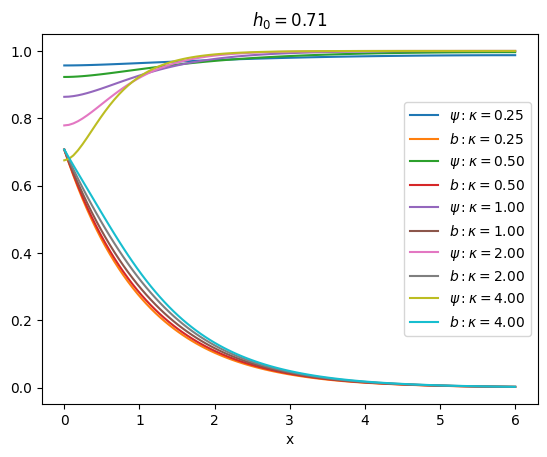

In [2]:
import matplotlib.pyplot as plt
from glcd import glplot,nat,SC

# basic usage vacuum boundary at $x=0$. As published the applied field is critical.

hc=1/2**(1/2)
for k in range(-2,3):
  kappa=2**k
  glplot(kappa,nat(0,hc),SC(6),f"\kappa={kappa:.2f}") # natural boundary x=0,superconducting at x=6 (x 'large')
plt.xlabel("x")
plt.title(f"$h_0={hc:.2f}$")
plt.legend()
plt.show()
